In [11]:
from google.cloud import storage
import pandas as pd
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sca-at-b5179177a346.json"

In [43]:
df=pd.read_csv('gs://acidentes_terrestres/dados_brutos/Acidentes por ocorrencia/acidentes_ocorrencias - geral.csv')

In [204]:
df1=df
df1

id data_inversa     dia_semana   horario  uf     br    km  \
0            8   2017-01-01        domingo  00:00:00  PR  376.0   112   
1            9   2017-01-01        domingo  00:01:00  SC  101.0   234   
2           11   2017-01-01        domingo  00:00:00  PR  153.0  56,9   
3           12   2017-01-01        domingo  00:00:00  GO  153.0   435   
4           13   2017-01-01        domingo  00:00:00  SC  280.0  77,3   
...        ...          ...            ...       ...  ..    ...   ...   
354288  414938   2021-07-03         sábado  10:40:00  SC  470.0   117   
354289  414939   2021-09-23   quinta-feira  17:00:00  MT  364.0   551   
354290  415073   2021-12-13  segunda-feira  06:55:00  SP  116.0   115   
354291  415112   2021-11-11   quinta-feira  11:25:00  MG  381.0   385   
354292  415604   2021-12-24    sexta-feira  19:30:00  MG  381.0   439   

                        municipio                            causa_acidente  \
0                       PARANAVAI                     Fenômenos da Natureza   
1                         PALHOCA               Falta de Atenção à Condução   
2        SANTO ANTONIO DA PLATINA                          Animais na Pista   
3                        ANAPOLIS   Avarias e/ou desgaste excessivo no pneu   
4                          CORUPA                        Ingestão de Álcool   
...                           ...                                       ...   
354288                    IBIRAMA                        Conversão proibida   
354289              ROSARIO OESTE  Reação tardia ou ineficiente do condutor   
354290                    TAUBATE                    Ultrapassagem Indevida   
354291  SAO GONCALO DO RIO ABAIXO                   Velocidade Incompatível   
354292                     SABARA                    Transitar na contramão   

                         tipo_acidente  ... feridos_graves ilesos ignorados  \
0         Queda de ocupante de veículo  ...              1      0         0   
1          Colisão com objeto estático  ...              0      1         0   
2                          Capotamento  ...              0      0         0   
3                           Tombamento  ...              1      0         0   
4            Saída de leito carroçável  ...              0      0         0   
...                                ...  ...            ...    ...       ...   
354288             Colisão transversal  ...              0      1         0   
354289       Saída de leito carroçável  ...              0      0         0   
354290             Colisão transversal  ...              0      3         0   
354291       Saída de leito carroçável  ...              0      0         0   
354292  Colisão lateral sentido oposto  ...              0      0         0   

       feridos veiculos latitude longitude  regional  delegacia       uop  
0            1        1      -23       -52     SR-PR     DEL7/7  UOP05/PR  
1            0        1      -28       -49     SR-SC     DEL8/1  UOP02/SC  
2            2        1      -23       310     SR-PR     DEL7/7  UOP07/PR  
3            1        1      -16       -49     SR-GO     DEL1/2  UOP01/GO  
4            1        1      -26       -49     SR-SC     DEL8/6  UOP03/SC  
...        ...      ...      ...       ...       ...        ...       ...  
354288       1        2      -27       -50     SR-SC      UOP02     DEL04  
354289       1        1      -15       -56     SR-MT      UOP01     DEL01  
354290       0        2      -23       -46     SR-SP      UOP02     DEL02  
354291       2        1      -20       -43     SR-MG      UOP01     DEL01  
354292       2        2      -20       -44     SR-MG      UOP01     DEL01  

[354293 rows x 30 columns]

In [61]:
df1.dtypes

id                         object
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                         object
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                  float64
longitude                 float64
regional                   object
delegacia                  object
uop           

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354293 entries, 0 to 354292
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      354293 non-null  object 
 1   data_inversa            354293 non-null  object 
 2   dia_semana              354293 non-null  object 
 3   horario                 354293 non-null  object 
 4   uf                      354293 non-null  object 
 5   br                      354293 non-null  object 
 6   km                      353613 non-null  object 
 7   municipio               354293 non-null  object 
 8   causa_acidente          354293 non-null  object 
 9   tipo_acidente           354293 non-null  object 
 10  classificacao_acidente  354293 non-null  object 
 11  fase_dia                354293 non-null  object 
 12  sentido_via             354293 non-null  object 
 13  condicao_metereologica  354293 non-null  object 
 14  tipo_pista          

In [63]:
df.isnull().sum()

id                            0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                            0
km                          680
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
pessoas                       0
mortos                        0
feridos_leves                 0
feridos_graves                0
ilesos                        0
ignorados                     0
feridos                       0
veiculos                      0
latitude                      0
longitude                     0
regional                      0
delegacia                     0
uop                       11090
dtype: int64

In [65]:
df1.isna().sum()

id                            0
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                            0
km                          680
municipio                     0
causa_acidente                0
tipo_acidente                 0
classificacao_acidente        0
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
pessoas                       0
mortos                        0
feridos_leves                 0
feridos_graves                0
ilesos                        0
ignorados                     0
feridos                       0
veiculos                      0
latitude                      0
longitude                     0
regional                      0
delegacia                     0
uop                       11090
dtype: int64

In [106]:
df1.groupby('br').count().sort_values(by='id', ascending=False)

id  data_inversa  dia_semana  horario     uf     km  municipio  \
br                                                                         
101.0  58233         58233       58233    58233  58233  58233      58233   
116.0  51877         51877       51877    51877  51877  51877      51877   
381.0  17786         17786       17786    17786  17786  17786      17786   
40.0   16781         16781       16781    16781  16781  16781      16781   
153.0  14135         14135       14135    14135  14135  14135      14135   
...      ...           ...         ...      ...    ...    ...        ...   
498.0      1             1           1        1      1      1          1   
486.0      1             1           1        1      1      1          1   
120.0      1             1           1        1      1      1          1   
342.0      1             1           1        1      1      1          1   
477.0      1             1           1        1      1      1          1   

       causa_acidente  tipo_acidente  classificacao_acidente  ...  \
br                                                            ...   
101.0           58233          58233                   58233  ...   
116.0           51877          51877                   51877  ...   
381.0           17786          17786                   17786  ...   
40.0            16781          16781                   16781  ...   
153.0           14135          14135                   14135  ...   
...               ...            ...                     ...  ...   
498.0               1              1                       1  ...   
486.0               1              1                       1  ...   
120.0               1              1                       1  ...   
342.0               1              1                       1  ...   
477.0               1              1                       1  ...   

       feridos_graves  ilesos  ignorados  feridos  veiculos  latitude  \
br                                                                      
101.0           58233   58233      58233    58233     58233     58233   
116.0           51877   51877      51877    51877     51877     51877   
381.0           17786   17786      17786    17786     17786     17786   
40.0            16781   16781      16781    16781     16781     16781   
153.0           14135   14135      14135    14135     14135     14135   
...               ...     ...        ...      ...       ...       ...   
498.0               1       1          1        1         1         1   
486.0               1       1          1        1         1         1   
120.0               1       1          1        1         1         1   
342.0               1       1          1        1         1         1   
477.0               1       1          1        1         1         1   

       longitude  regional  delegacia    uop  
br                                            
101.0      58233     58233      58233  58231  
116.0      51877     51877      51877  51877  
381.0      17786     17786      17786  17768  
40.0       16781     16781      16781  14576  
153.0      14135     14135      14135  12466  
...          ...       ...        ...    ...  
498.0          1         1          1      1  
486.0          1         1          1      1  
120.0          1         1          1      1  
342.0          1         1          1      1  
477.0          1         1          1      1  

[129 rows x 29 columns]

In [88]:
df1.br.unique()

array(['376.0', '101.0', '153.0', '280.0', '60.0', '104.0', '116.0',
       '290.0', '408.0', '316.0', '20.0', '262.0', '163.0', '277.0',
       '467.0', '343.0', '242.0', '235.0', '381.0', '70.0', '459.0',
       '324.0', '230.0', '40.0', '135.0', '356.0', '174.0', '285.0',
       '364.0', '222.0', '232.0', '282.0', '50.0', '365.0', '405.0',
       '476.0', '470.0', '158.0', '407.0', '367.0', 'nan', '10.0',
       '251.0', '304.0', '373.0', '480.0', '287.0', '386.0', '293.0',
       '415.0', '423.0', '267.0', '392.0', '418.0', '463.0', '369.0',
       '110.0', '448.0', '495.0', '424.0', '393.0', '259.0', '414.0',
       '493.0', '410.0', '488.0', '354.0', '80.0', '412.0', '317.0',
       '416.0', '428.0', '272.0', '468.0', '469.0', '319.0', '226.0',
       '452.0', '146.0', '465.0', '359.0', '156.0', '406.0', '210.0',
       '330.0', '401.0', '471.0', '404.0', '420.0', '487.0', '155.0',
       '402.0', '421.0', '447.0', '427.0', '472.0', '30.0', '361.0',
       '377.0', '308.0', '419.

In [78]:
df1['id']=df1.id.astype(int)

In [79]:
df['id']=df1.id.astype(str)

In [49]:
df1.id

0              8
1              9
2             11
3             12
4             13
           ...  
354288    414938
354289    414939
354290    415073
354291    415112
354292    415604
Name: id, Length: 354293, dtype: object

In [50]:
df1.describe()

br  pessoas  mortos  feridos_leves  feridos_graves  ilesos  \
count 353,613  354,293 354,293        354,293         354,293 354,293   
mean      214        2       0              1               0       1   
std       131        2       0              1               1       1   
min        10        1       0              0               0       0   
25%       101        1       0              0               0       0   
50%       163        2       0              1               0       1   
75%       330        3       0              1               0       1   
max       498       80      21             58              28      73   

       ignorados  feridos  veiculos       latitude      longitude  
count    354,293  354,293   354,293        354,293        354,293  
mean           0        1         2         -3,057        -11,653  
std            0        1         1      1,736,883      6,749,265  
min            0        0         1 -1,033,382,874 -4,016,764,289  
25%            0        0         1            -25            -50  
50%            0        1         2            -20            -48  
75%            0        1         2            -13            -43  
max           42       66        23            163            717

In [51]:
df1.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [59]:
df1.br.unique()

array(['376.0', '101.0', '153.0', '280.0', '60.0', '104.0', '116.0',
       '290.0', '408.0', '316.0', '20.0', '262.0', '163.0', '277.0',
       '467.0', '343.0', '242.0', '235.0', '381.0', '70.0', '459.0',
       '324.0', '230.0', '40.0', '135.0', '356.0', '174.0', '285.0',
       '364.0', '222.0', '232.0', '282.0', '50.0', '365.0', '405.0',
       '476.0', '470.0', '158.0', '407.0', '367.0', 'nan', '10.0',
       '251.0', '304.0', '373.0', '480.0', '287.0', '386.0', '293.0',
       '415.0', '423.0', '267.0', '392.0', '418.0', '463.0', '369.0',
       '110.0', '448.0', '495.0', '424.0', '393.0', '259.0', '414.0',
       '493.0', '410.0', '488.0', '354.0', '80.0', '412.0', '317.0',
       '416.0', '428.0', '272.0', '468.0', '469.0', '319.0', '226.0',
       '452.0', '146.0', '465.0', '359.0', '156.0', '406.0', '210.0',
       '330.0', '401.0', '471.0', '404.0', '420.0', '487.0', '155.0',
       '402.0', '421.0', '447.0', '427.0', '472.0', '30.0', '361.0',
       '377.0', '308.0', '419.

In [53]:
df1.dtypes

id                         object
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                  float64
longitude                 float64
regional                   object
delegacia                  object
uop           

In [55]:
df1['br']=df1.br.astype(str)

In [56]:
df1.br.unique()

array(['376.0', '101.0', '153.0', '280.0', '60.0', '104.0', '116.0',
       '290.0', '408.0', '316.0', '20.0', '262.0', '163.0', '277.0',
       '467.0', '343.0', '242.0', '235.0', '381.0', '70.0', '459.0',
       '324.0', '230.0', '40.0', '135.0', '356.0', '174.0', '285.0',
       '364.0', '222.0', '232.0', '282.0', '50.0', '365.0', '405.0',
       '476.0', '470.0', '158.0', '407.0', '367.0', 'nan', '10.0',
       '251.0', '304.0', '373.0', '480.0', '287.0', '386.0', '293.0',
       '415.0', '423.0', '267.0', '392.0', '418.0', '463.0', '369.0',
       '110.0', '448.0', '495.0', '424.0', '393.0', '259.0', '414.0',
       '493.0', '410.0', '488.0', '354.0', '80.0', '412.0', '317.0',
       '416.0', '428.0', '272.0', '468.0', '469.0', '319.0', '226.0',
       '452.0', '146.0', '465.0', '359.0', '156.0', '406.0', '210.0',
       '330.0', '401.0', '471.0', '404.0', '420.0', '487.0', '155.0',
       '402.0', '421.0', '447.0', '427.0', '472.0', '30.0', '361.0',
       '377.0', '308.0', '419.

In [89]:
df.causa_acidente.unique()

array(['Fenômenos da Natureza', 'Falta de Atenção à Condução',
       'Animais na Pista', 'Avarias e/ou desgaste excessivo no pneu',
       'Ingestão de Álcool', 'Defeito Mecânico no Veículo',
       'Desobediência às normas de trânsito pelo condutor',
       'Velocidade Incompatível', 'Restrição de Visibilidade',
       'Falta de Atenção do Pedestre', 'Condutor Dormindo',
       'Pista Escorregadia', 'Não guardar distância de segurança',
       'Ultrapassagem Indevida', 'Defeito na Via',
       'Sinalização da via insuficiente ou inadequada', 'Mal Súbito',
       'Carga excessiva e/ou mal acondicionada',
       'Objeto estático sobre o leito carroçável',
       'Deficiência ou não Acionamento do Sistema de Iluminação/Sinalização do Veículo',
       'Ingestão de Substâncias Psicoativas', 'Agressão Externa',
       'Desobediência às normas de trânsito pelo pedestre',
       'Ingestão de álcool e/ou substâncias psicoativas pelo pedestre',
       'Ausência de reação do condutor', 'Falta d

In [93]:
df1.tipo_acidente.unique()

array(['Queda de ocupante de veículo', 'Colisão com objeto estático',
       'Capotamento', 'Tombamento', 'Saída de leito carroçável',
       'Colisão traseira', 'Atropelamento de Animal', 'Colisão frontal',
       'Incêndio', 'Atropelamento de Pedestre', 'Colisão lateral',
       'Colisão transversal', 'Colisão com objeto em movimento',
       'Derramamento de carga', 'Engavetamento', 'Danos eventuais',
       'Colisão com objeto', 'Colisão lateral mesmo sentido',
       'Colisão lateral sentido oposto', 'Eventos atípicos'], dtype=object)

<AxesSubplot:xlabel='Tipo Acidentes', ylabel='Total'>

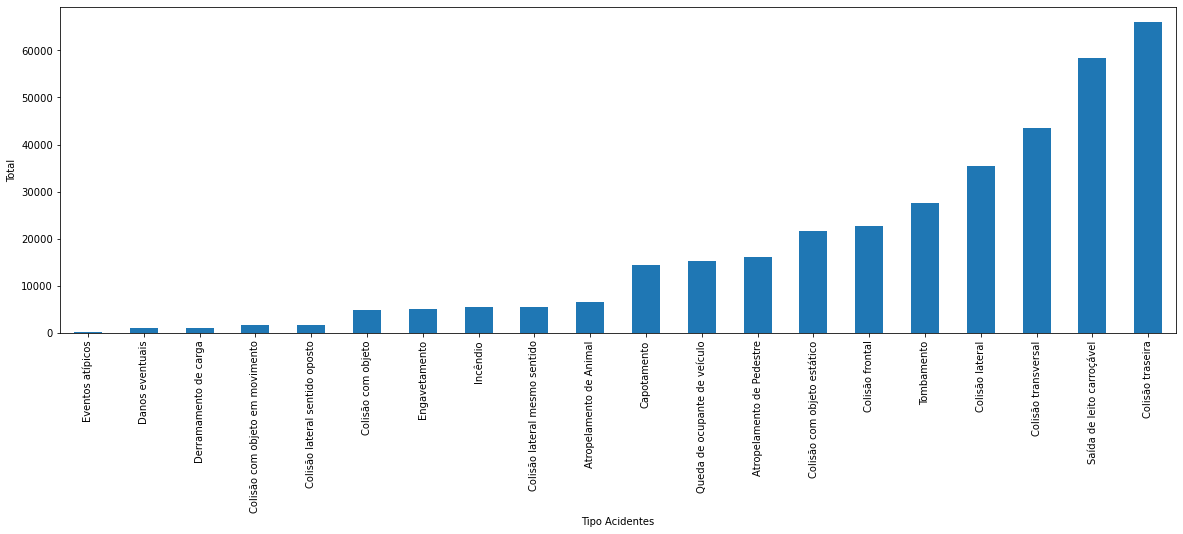

In [101]:
df1.groupby('tipo_acidente').id.count().sort_values().plot(kind='bar', figsize=(20,6), xlabel= "Tipo Acidentes",ylabel='Total' )

In [111]:
df1.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [112]:
df1.fase_dia.unique()

array(['Plena Noite', 'Amanhecer', 'Pleno dia', 'Anoitecer'], dtype=object)

In [117]:
total=df.id.count()
total

354293

In [189]:
a=pd.DataFrame(df1.groupby('fase_dia').id.count())
lista=[]
for i in a.id:
    lista.append(i/total*100)
a['%']=lista
a

id  %
fase_dia              
Amanhecer     17199  5
Anoitecer     19480  5
Plena Noite  123372 35
Pleno dia    194242 55

<AxesSubplot:xlabel='Fase do dia', ylabel='Total'>

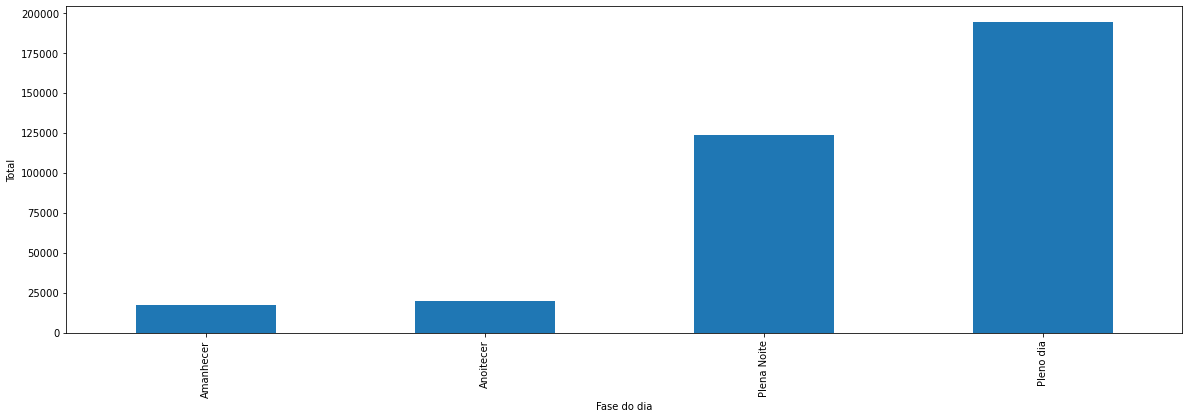

In [113]:
df1.groupby('fase_dia').id.count().sort_values().plot(kind='bar', figsize=(20,6), xlabel= "Fase do dia",ylabel='Total' )

In [214]:
a=pd.DataFrame(df1.groupby('fase_dia').mortos.sum())
total=df1.mortos.sum()
print('Total de mortos em rodovias federais', total)
lista=[]
a
for i in a.mortos:
    print(i)
    lista.append(i/total*100)
a['%']=lista
total

Total de mortos em rodovias federais 27523
1928
1390
13373
10832


27523

<AxesSubplot:xlabel='fase_dia'>

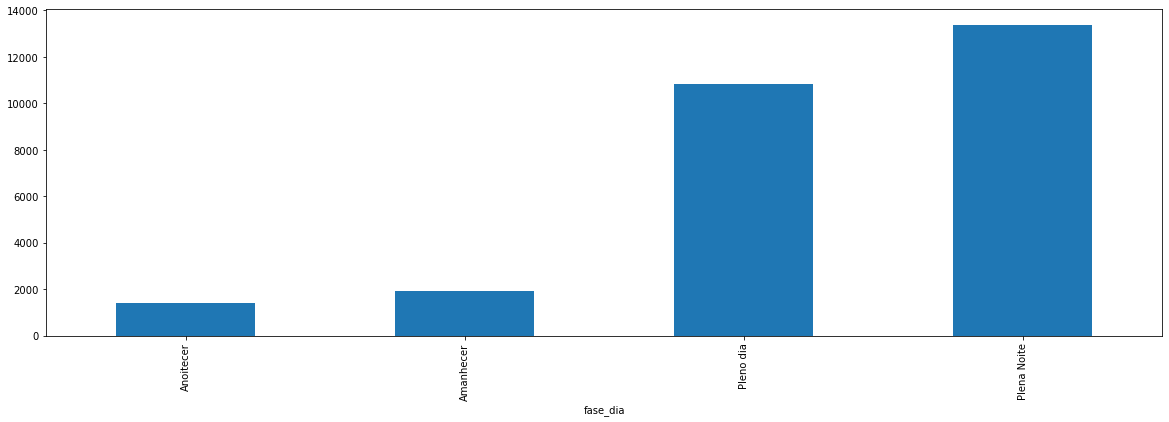

In [157]:
df1.groupby('fase_dia').mortos.sum().sort_values().plot(kind='bar', figsize=(20,6))

<AxesSubplot:xlabel='fase_dia'>

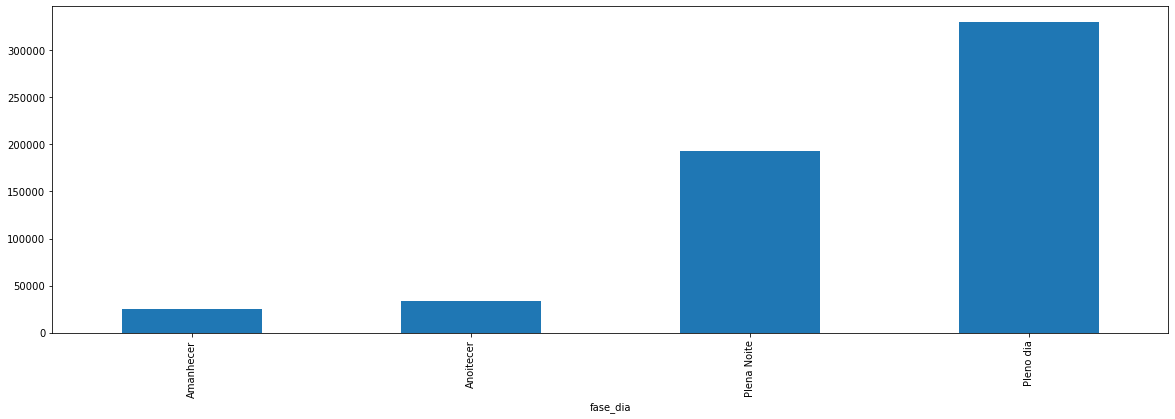

In [205]:
df1.groupby('fase_dia').veiculos.sum().sort_values().plot(kind='bar', figsize=(20,6))

Total de pessoas feridas em acidentes em rodovias federais: 383207


<AxesSubplot:xlabel='fase_dia'>

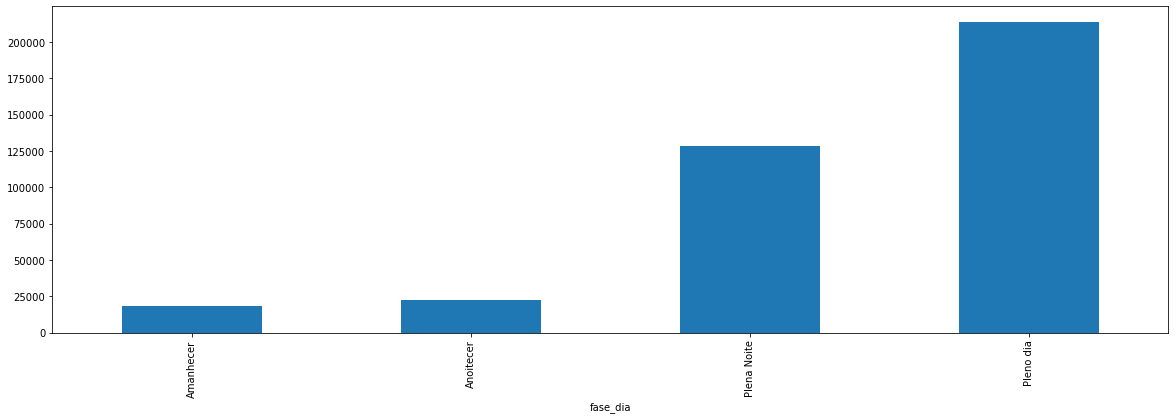

In [213]:
total=df1.feridos.sum()
print('Total de pessoas feridas em acidentes em rodovias federais:',total)
df1.groupby('fase_dia').feridos.sum().sort_values().plot(kind='bar', figsize=(20,6))

In [216]:
df1.tipo_pista.unique()


array(['Simples', 'Dupla', 'Múltipla'], dtype=object)

In [217]:
df1.tracado_via.unique()

array(['Reta', 'Curva', 'Não Informado', 'Interseção de vias',
       'Rotatória', 'Desvio Temporário', 'Viaduto', 'Ponte',
       'Retorno Regulamentado', 'Túnel'], dtype=object)

In [225]:
df1.groupby('tracado_via').id.count().sort_values(ascending=False)

tracado_via
Reta                     215175
Curva                     59196
Não Informado             38046
Interseção de vias        15912
Desvio Temporário          9848
Rotatória                  7127
Retorno Regulamentado      4102
Viaduto                    2510
Ponte                      1963
Túnel                       414
Name: id, dtype: int64

In [227]:
df1.groupby('tipo_pista').id.count().sort_values(ascending=False)

tipo_pista
Simples     180122
Dupla       146616
Múltipla     27555
Name: id, dtype: int64

In [228]:
df1.uso_solo.unique()

array(['Não', 'Sim'], dtype=object)

<AxesSubplot:xlabel='uso_solo'>

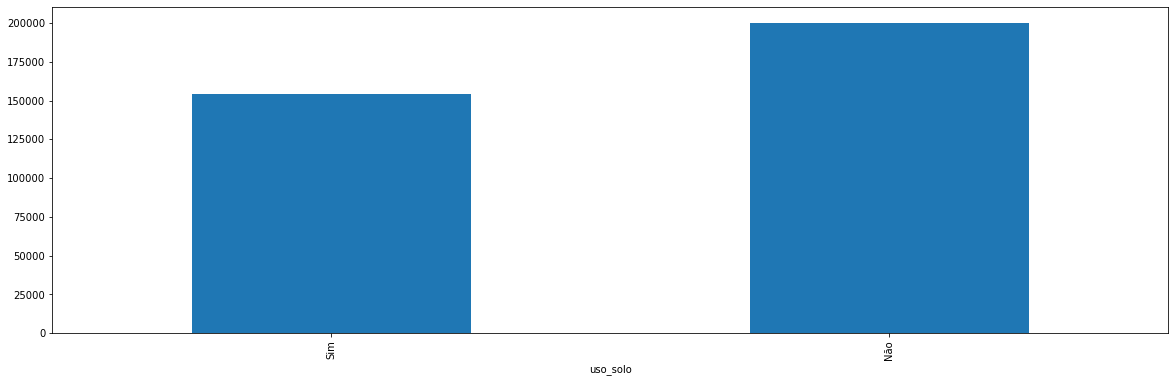

In [233]:
df1.groupby('uso_solo').id.count().sort_values().plot(kind='bar', figsize=(20,6))

In [263]:
filtro=df1['latitude']==0
filtro2=df1['longitude']==0
d1=df1[~(filtro & filtro2)]

In [264]:
df1

id data_inversa     dia_semana   horario  uf     br    km  \
0            8   2017-01-01        domingo  00:00:00  PR  376.0   112   
1            9   2017-01-01        domingo  00:01:00  SC  101.0   234   
2           11   2017-01-01        domingo  00:00:00  PR  153.0  56,9   
3           12   2017-01-01        domingo  00:00:00  GO  153.0   435   
4           13   2017-01-01        domingo  00:00:00  SC  280.0  77,3   
...        ...          ...            ...       ...  ..    ...   ...   
354288  414938   2021-07-03         sábado  10:40:00  SC  470.0   117   
354289  414939   2021-09-23   quinta-feira  17:00:00  MT  364.0   551   
354290  415073   2021-12-13  segunda-feira  06:55:00  SP  116.0   115   
354291  415112   2021-11-11   quinta-feira  11:25:00  MG  381.0   385   
354292  415604   2021-12-24    sexta-feira  19:30:00  MG  381.0   439   

                        municipio                            causa_acidente  \
0                       PARANAVAI                     Fenômenos da Natureza   
1                         PALHOCA               Falta de Atenção à Condução   
2        SANTO ANTONIO DA PLATINA                          Animais na Pista   
3                        ANAPOLIS   Avarias e/ou desgaste excessivo no pneu   
4                          CORUPA                        Ingestão de Álcool   
...                           ...                                       ...   
354288                    IBIRAMA                        Conversão proibida   
354289              ROSARIO OESTE  Reação tardia ou ineficiente do condutor   
354290                    TAUBATE                    Ultrapassagem Indevida   
354291  SAO GONCALO DO RIO ABAIXO                   Velocidade Incompatível   
354292                     SABARA                    Transitar na contramão   

                         tipo_acidente  ... feridos_graves ilesos ignorados  \
0         Queda de ocupante de veículo  ...              1      0         0   
1          Colisão com objeto estático  ...              0      1         0   
2                          Capotamento  ...              0      0         0   
3                           Tombamento  ...              1      0         0   
4            Saída de leito carroçável  ...              0      0         0   
...                                ...  ...            ...    ...       ...   
354288             Colisão transversal  ...              0      1         0   
354289       Saída de leito carroçável  ...              0      0         0   
354290             Colisão transversal  ...              0      3         0   
354291       Saída de leito carroçável  ...              0      0         0   
354292  Colisão lateral sentido oposto  ...              0      0         0   

       feridos veiculos latitude longitude  regional  delegacia       uop  
0            1        1      -23       -52     SR-PR     DEL7/7  UOP05/PR  
1            0        1      -28       -49     SR-SC     DEL8/1  UOP02/SC  
2            2        1      -23       310     SR-PR     DEL7/7  UOP07/PR  
3            1        1      -16       -49     SR-GO     DEL1/2  UOP01/GO  
4            1        1      -26       -49     SR-SC     DEL8/6  UOP03/SC  
...        ...      ...      ...       ...       ...        ...       ...  
354288       1        2      -27       -50     SR-SC      UOP02     DEL04  
354289       1        1      -15       -56     SR-MT      UOP01     DEL01  
354290       0        2      -23       -46     SR-SP      UOP02     DEL02  
354291       2        1      -20       -43     SR-MG      UOP01     DEL01  
354292       2        2      -20       -44     SR-MG      UOP01     DEL01  

[354286 rows x 30 columns]